In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import pyodbc
import pandas as pd



In [16]:
from importlib import reload
import pyMechkar as mechkar
reload(mechkar)

<module 'pyMechkar' from 'C:\\Users\\dannyvaks\\Documents\\GitHub\\DataScience\\project\\pyMechkar.py'>

In [2]:
### In windows, Using a ODBC DNS (predefined connection name)
conn = pyodbc.connect('DSN=hair_salon_no_shown_ff;Trusted_Connection=yes;')

In [3]:
noshow = pd.read_sql("SELECT * FROM hair_salon_no_shown_ff;",conn) 
noshow.head()

,book_tod,book_dow,book_category,book_staff,last_category,last_staff,last_day_services,last_receipt_tot,last_dow,last_tod,...,last_prod_flag,last_cumrev,last_cumbook,last_cumstyle,last_cumcolor,last_cumprod,last_cumcancel,last_cumnoshow,recency,noshow
0,afternoon,Wednesday,STYLE,JJ,unknown,unknown,0,0,unknown,unknown,...,0,0,0,0,0,0,0,0,0,0
1,morning,Wednesday,COLOR,JOANNE,unknown,unknown,0,0,unknown,unknown,...,0,0,0,0,0,0,0,0,0,0
2,unknown,Wednesday,STYLE,JJ,COLOR,JOANNE,2,262,Wednesday,morning,...,1,262,2,1,1,2,0,0,35,0
3,afternoon,Thursday,STYLE,KELLY,unknown,unknown,0,0,unknown,unknown,...,0,0,0,0,0,0,0,0,0,0
4,evening,Saturday,STYLE,KELLY,STYLE,KELLY,1,35,Thursday,afternoon,...,0,35,1,1,0,0,0,0,9,0


In [5]:
categoryVariableList = ["book_tod","book_dow","book_category","book_staff","last_category","last_staff","last_dow","last_tod"]
for var in categoryVariableList:
    noshow[var] = noshow[var].astype("category")

In [6]:
numericVariableList = ["last_day_services","last_receipt_tot","last_noshow","last_prod_flag","last_cumrev","last_cumbook","last_cumstyle","last_cumcolor","last_cumprod","last_cumcancel","last_cumnoshow","recency","noshow"]
for var in numericVariableList:
    noshow[var] = noshow[var].astype("float64")

In [7]:
noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 21 columns):
book_tod             1952 non-null category
book_dow             1952 non-null category
book_category        1952 non-null category
book_staff           1952 non-null category
last_category        1952 non-null category
last_staff           1952 non-null category
last_day_services    1952 non-null float64
last_receipt_tot     1952 non-null float64
last_dow             1952 non-null category
last_tod             1952 non-null category
last_noshow          1952 non-null float64
last_prod_flag       1952 non-null float64
last_cumrev          1952 non-null float64
last_cumbook         1952 non-null float64
last_cumstyle        1952 non-null float64
last_cumcolor        1952 non-null float64
last_cumprod         1952 non-null float64
last_cumcancel       1952 non-null float64
last_cumnoshow       1952 non-null float64
recency              1952 non-null float64
noshow               1952

In [8]:
noshow.describe() # describe data

,last_day_services,last_receipt_tot,last_noshow,last_prod_flag,last_cumrev,last_cumbook,last_cumstyle,last_cumcolor,last_cumprod,last_cumcancel,last_cumnoshow,recency,noshow
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,0.545082,35.782679,0.076332,0.114242,111.258197,1.906762,1.520492,0.325307,0.487193,0.280225,0.422643,14.402152,0.114754
std,0.658514,59.371877,0.265597,0.318186,207.927702,3.315854,2.756585,0.827646,1.261275,0.853646,1.319786,21.079495,0.318807
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,132.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000
max,3.000000,382.800000,1.000000,1.000000,1276.000000,20.000000,18.000000,7.000000,11.000000,8.000000,9.000000,133.000000,1.000000


In [9]:
noshow.isnull().sum() #missing cheack

book_tod             0
book_dow             0
book_category        0
book_staff           0
last_category        0
last_staff           0
last_day_services    0
last_receipt_tot     0
last_dow             0
last_tod             0
last_noshow          0
last_prod_flag       0
last_cumrev          0
last_cumbook         0
last_cumstyle        0
last_cumcolor        0
last_cumprod         0
last_cumcancel       0
last_cumnoshow       0
recency              0
noshow               0
dtype: int64

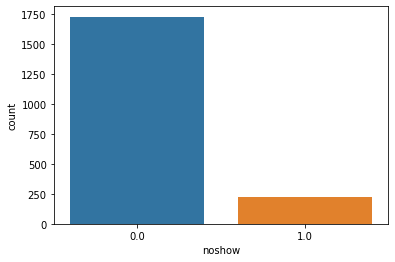

In [10]:
sns.countplot(x='noshow', data=noshow) #Distribution of the dependent variable

The data is imbalanced, there are more 0s than 1s in the dependent variable.

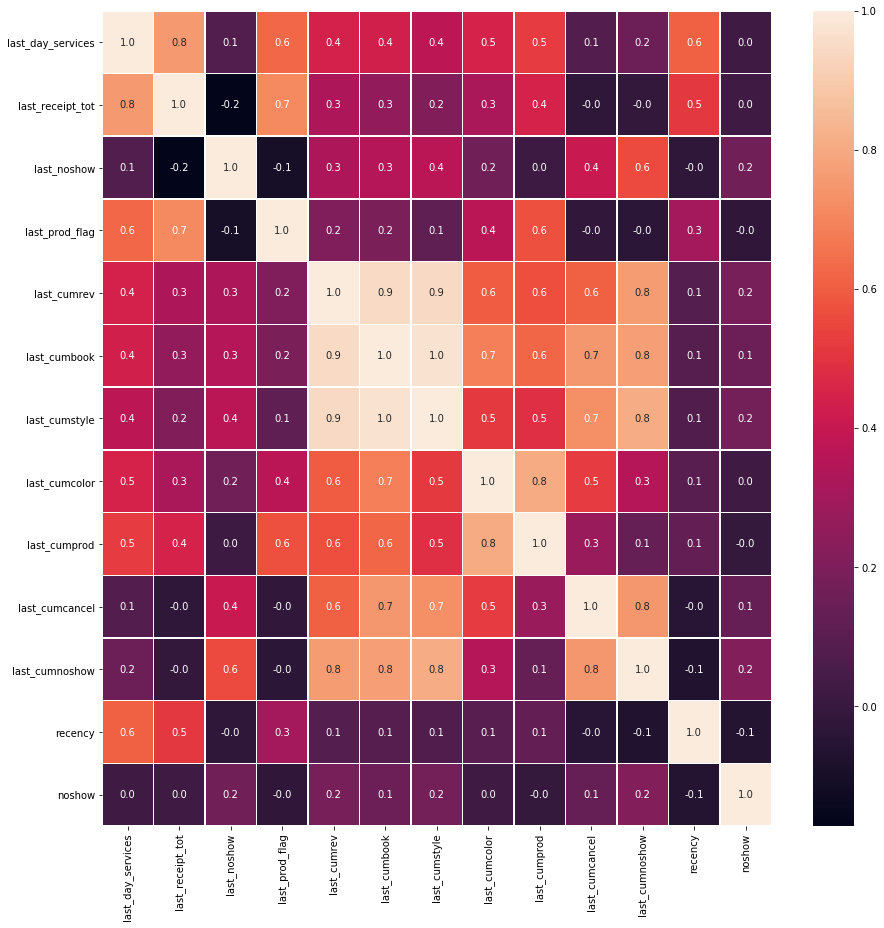

In [11]:
f, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(noshow.corr(), annot = True, linewidths = .5, fmt = '.1f', ax = ax)
plt.show()

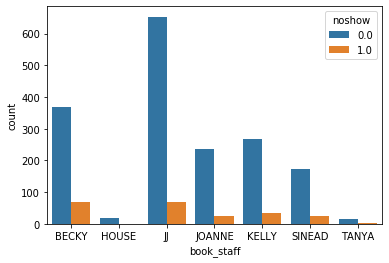

In [12]:
sns.countplot(x='book_staff', hue = "noshow", data=noshow)

According to the graph, Becky gets proportionally more no-shows than others.

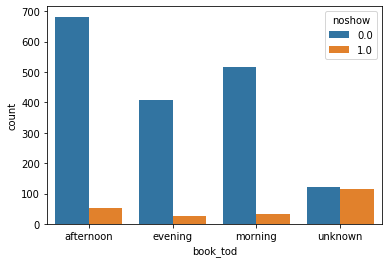

In [13]:
sns.countplot(x = "book_tod", hue = "noshow", data = noshow)

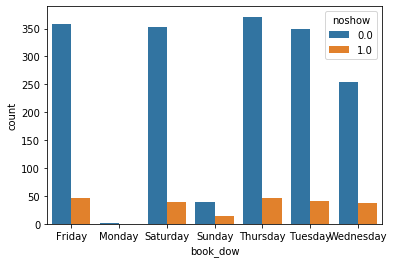

In [14]:
sns.countplot(x = "book_dow", hue = "noshow", data = noshow)

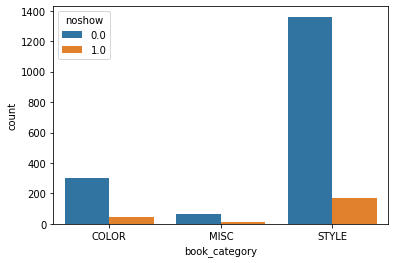

In [15]:
sns.countplot(x = "book_category", hue = "noshow", data = noshow)